In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn

from sklearn.model_selection import train_test_split

from scipy.stats import ks_2samp

In [2]:
feats_option = 'yn'
label_dict = {'nn': 'norptnonu', 'ny': 'norptwnu', 'yn': 'wrptnonu', 'yy': 'wrptwnu'}

In [3]:
n_epochs, batch_size, learning_rate = np.load('results/'+label_dict[feats_option]+'-params.npy')
n_epochs = int(n_epochs)
batch_size = int(batch_size)
train_outputs = np.load('results/'+label_dict[feats_option]+'-train_output.npy')
val_outputs = np.load('results/'+label_dict[feats_option]+'-val_output.npy')

In [4]:
def flags_loading(opt):
    options_dict = {'nn': '../processed_ntuples/chunking/chunk_nonu_data.npy',
                    'ny': '../processed_ntuples/chunking/chunk_wnu_data.npy',
                    'yn': '../processed_ntuples/chunking/chunk_nonu_data.npy',
                    'yy': '../processed_ntuples/chunking/chunk_wnu_data.npy'}
    data = np.load(options_dict[opt])
    if opt == 'nn' or 'ny': data = np.concatenate((data[:,0:-2], data[:,-1].reshape(-1,1)), axis=1)
    train, val = train_test_split(data, random_state=137)
    # copy in dedicated arrays
    flags_train = train[:, -1]
    flags_val = val[:, -1]
    return [flags_train, flags_val]

flags_train, flags_val = flags_loading(feats_option)

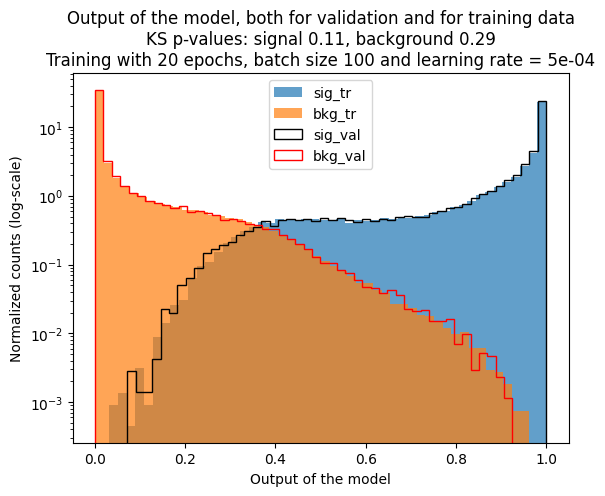

In [5]:
n_bins=50
sig_val = val_outputs[flags_val.T.astype(bool)]
bkg_val = val_outputs[~flags_val.T.astype(bool)]
sig_tr = train_outputs[flags_train.T.astype(bool)]
bkg_tr = train_outputs[~flags_train.T.astype(bool)]
sig_tr_bins = plt.hist(sig_tr, bins=n_bins, density=True,  alpha=0.7, label='sig_tr')[0]
bkg_tr_bins = plt.hist(bkg_tr, bins=n_bins, density=True, alpha=0.7, label='bkg_tr')[0]
sig_val_bins = plt.hist(sig_val, bins=n_bins, density=True, histtype='step', color='k', label='sig_val')[0]
bkg_val_bins = plt.hist(bkg_val, bins=n_bins, density=True, histtype='step', color='red', label='bkg_val')[0]
plt.title(f'Output of the model, both for validation and for training data\nKS p-values: signal {ks_2samp(sig_tr.reshape(1,-1).squeeze(), sig_val.reshape(1,-1).squeeze())[1]:.2f}, '
          +f'background {ks_2samp(bkg_tr.reshape(1,-1).squeeze(), bkg_val.reshape(1,-1).squeeze())[1]:.2f}\nTraining with {n_epochs} epochs, batch size {batch_size} and learning rate = {learning_rate:.0e}')
plt.yscale('log')
plt.xlabel('Output of the model')
plt.ylabel('Normalized counts (log-scale)')
plt.legend()

In [6]:
ks_2samp(bkg_tr.reshape(1,-1).squeeze(), bkg_val.reshape(1,-1).squeeze())[1]

0.28707121101116084

In [7]:
#